## 1. Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# configuration pour une meilleure lisibilité
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

# chargement du dataset
top_100_songs = pd.read_csv('../../raw_data/spotify2000-2023_enriched_with_countries.csv', sep=';')

# forme des données
print(f"Le dataset contient {top_100_songs.shape[0]} lignes et {top_100_songs.shape[1]} colonnes.")

top_100_songs.head()

Le dataset contient 2385 lignes et 15 colonnes.


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,country
0,Flowers,Miley Cyrus,pop,2023.0,118.0,68.0,71.0,-4.0,3.0,65.0,200.0,6.0,7.0,98.0,US
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023.0,120.0,59.0,78.0,-8.0,35.0,73.0,174.0,44.0,3.0,97.0,KR
2,BESO,ROSALÍA,pop,2023.0,95.0,64.0,77.0,-7.0,17.0,53.0,195.0,74.0,14.0,96.0,ES
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023.0,133.0,81.0,70.0,-8.0,25.0,86.0,131.0,25.0,5.0,96.0,UNKNOWN
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022.0,98.0,62.0,72.0,-6.0,8.0,17.0,222.0,42.0,5.0,96.0,US


## 2. Exploration des données

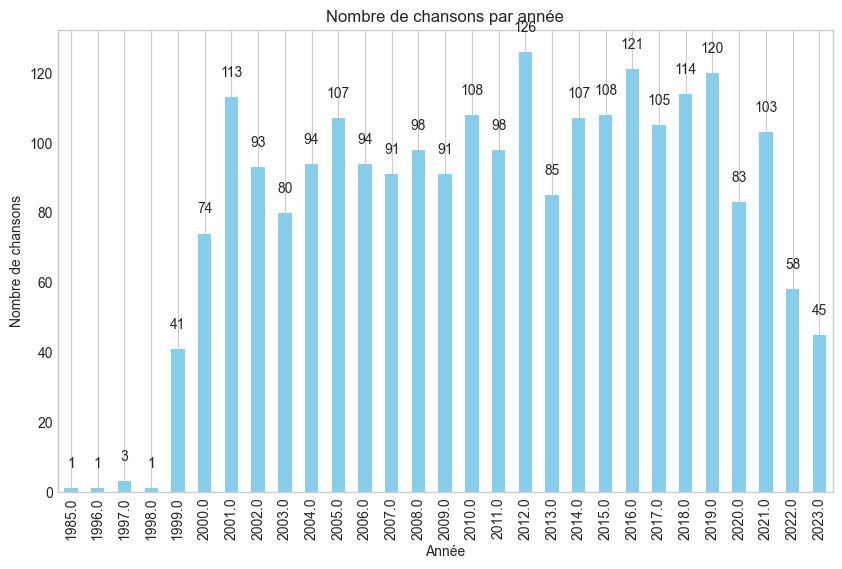

In [ ]:
# dessiner le nombre de chansons par année avec des annotations
def plot_songs_per_year(df):
    songs_per_year = df['year'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    ax = songs_per_year.plot(kind='bar', color='skyblue')
    plt.title('Nombre de chansons par année')
    plt.xlabel('Année')
    plt.ylabel('Nombre de chansons')
    plt.grid(axis='y')
    
    # ajouter des annotations au-dessus de chaque barre
    for i, value in enumerate(songs_per_year):
        ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.show()

plot_songs_per_year(top_100_songs)

In [ ]:
# garder uniquement les chansons des années 2000 à 2022
top_100_songs = top_100_songs[(top_100_songs['year'] >= 2000) & (top_100_songs['year'] <= 2022)]
top_100_songs.reset_index(drop=True, inplace=True)

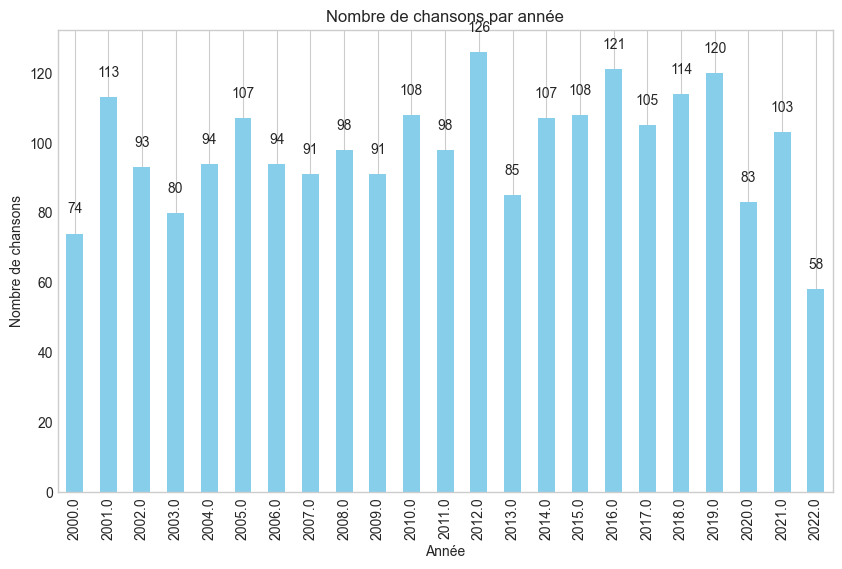

In [ ]:
plot_songs_per_year(top_100_songs)

In [ ]:
# trier le dataframe par année puis par popularité décroissante
def sort_songs_by_year_and_popularity(df):
    sorted_df = df.sort_values(by=['year', 'popularity'], ascending=[True, False])
    sorted_df.reset_index(drop=True, inplace=True)
    return sorted_df

sorted_top_100_songs = sort_songs_by_year_and_popularity(top_100_songs)
sorted_top_100_songs.head(3)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,country
0,Yellow,Coldplay,permanent wave,2000.0,173.0,66.0,43.0,-7.0,23.0,28.0,267.0,0.0,3.0,90.0,GB
1,The Real Slim Shady,Eminem,detroit hip hop,2000.0,105.0,66.0,95.0,-4.0,5.0,76.0,284.0,3.0,6.0,89.0,US
2,In the End,Linkin Park,alternative metal,2000.0,105.0,86.0,56.0,-6.0,21.0,40.0,217.0,1.0,6.0,87.0,US


In [ ]:
# garder uniquement les 50 chansons les plus populaires par année
def get_top_n_songs_per_year(df, n=50):
    top_n_songs = df.groupby('year').head(n)
    top_n_songs.reset_index(drop=True, inplace=True)
    return top_n_songs

final_top_50_songs = get_top_n_songs_per_year(sorted_top_100_songs, n=50)
final_top_50_songs.head(3)


,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity,country
0,Yellow,Coldplay,permanent wave,2000.0,173.0,66.0,43.0,-7.0,23.0,28.0,267.0,0.0,3.0,90.0,GB
1,The Real Slim Shady,Eminem,detroit hip hop,2000.0,105.0,66.0,95.0,-4.0,5.0,76.0,284.0,3.0,6.0,89.0,US
2,In the End,Linkin Park,alternative metal,2000.0,105.0,86.0,56.0,-6.0,21.0,40.0,217.0,1.0,6.0,87.0,US


In [ ]:
print(f"Le dataset final contient {final_top_50_songs.shape[0]} lignes et {final_top_50_songs.shape[1]} colonnes.")

Le dataset final contient 1150 lignes et 15 colonnes.


In [ ]:
# vérifier s'il existe des données manquantes
final_top_50_songs.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
country          0
dtype: int64

## 3. Sauvegarde des résultats

In [ ]:
# sauvegarde des résultats
os.makedirs('../../data', exist_ok=True)
final_top_50_songs.to_csv('../../data/top_50mondialSongPerYear_from_2000_to_2023.csv', index=False)